In [1]:
from tifffile import imread
from csbdeep.utils import axes_dict, plot_some, plot_history
from csbdeep.io import load_training_data
from csbdeep.models import Config, CARE
import os
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Using TensorFlow backend.


In [2]:
BaseDir = '/home/sancere/Kepler/CurieTrainingDatasets/DalmiroCompartments/'
NPZdata = 'WingCompartmentModelUNET.npz'

ModelDir ='/home/sancere/Kepler/CurieDeepLearningModels/DalmiroCompartments/'
ModelName = 'WingCompartmentUNET'
load_path = BaseDir + NPZdata 

In [3]:
(X,Y), (X_val,Y_val), axes = load_training_data(load_path, validation_split=0.1, verbose=True)

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

(7, 3, 768, 1024) (7, 1, 768, 1024)
number of training images:	 6
number of validation images:	 1
image size (2D):		 (768, 1024)
axes:				 SYXC
channels in / out:		 3 / 1


/home/sancere/anaconda3/lib/python3.7/site-packages/csbdeep/utils/plot_utils.py:55: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return _plot_some(arr=arr, title_list=title_list, pmin=pmin, pmax=pmax, cmap=cmap, **imshow_kwargs)


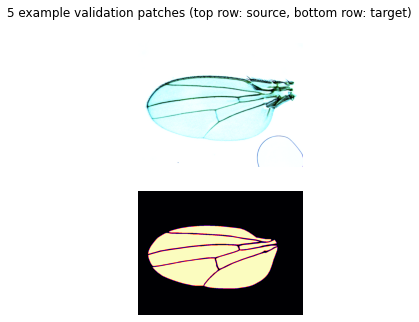

In [4]:
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');

In [5]:
config = config = Config(axes, n_channel_in, n_channel_out, probabilistic = False, unet_n_depth=3, train_loss = 'mae', unet_kern_size=3,train_epochs= 150, train_learning_rate = 1.0E-4 ,train_batch_size = 4,  train_reduce_lr={'patience': 5, 'factor': 0.5})
print(config)
vars(config)

Config(axes='YXC', n_channel_in=3, n_channel_out=1, n_dim=2, probabilistic=False, train_batch_size=4, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_epochs=150, train_learning_rate=0.0001, train_loss='mae', train_reduce_lr={'patience': 5, 'factor': 0.5}, train_steps_per_epoch=400, train_tensorboard=True, unet_input_shape=(None, None, 3), unet_kern_size=3, unet_last_activation='linear', unet_n_depth=3, unet_n_first=32, unet_residual=False)


{'n_dim': 2,
 'axes': 'YXC',
 'n_channel_in': 3,
 'n_channel_out': 1,
 'train_checkpoint': 'weights_best.h5',
 'train_checkpoint_last': 'weights_last.h5',
 'train_checkpoint_epoch': 'weights_now.h5',
 'probabilistic': False,
 'unet_residual': False,
 'unet_n_depth': 3,
 'unet_kern_size': 3,
 'unet_n_first': 32,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, 3),
 'train_loss': 'mae',
 'train_epochs': 150,
 'train_steps_per_epoch': 400,
 'train_learning_rate': 0.0001,
 'train_batch_size': 4,
 'train_tensorboard': True,
 'train_reduce_lr': {'patience': 5, 'factor': 0.5}}

In [6]:
model = CARE(config = config, name = ModelName, basedir = ModelDir)

/home/sancere/anaconda3/lib/python3.7/site-packages/csbdeep/models/base_model.py:148: UserWarning: output path for model already exists, files may be overwritten: /home/sancere/Kepler/CurieDeepLearningModels/DalmiroCompartments/WingCompartmentUNET
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))


In [ ]:
history = model.train(X,Y, validation_data=(X_val,Y_val))










The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Epoch 1/150
  4/400 [..............................] - ETA: 1:38:12 - loss: 0.3435 - mse: 0.3240 - mae: 0.3435

In [ ]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss'],['mse','val_mse','mae','val_mae']);

In [ ]:
plt.figure(figsize=(12,7))
_P = model.keras_model.predict(X_val[25:30])
if config.probabilistic:
    _P = _P[...,:(_P.shape[-1]//2)]
plot_some(X_val[25:30],Y_val[25:30],_P,pmax=99.5)
plt.suptitle('5 example validation patches\n'      
             'top row: input (source),  '          
             'middle row: target (ground truth),  '
             'bottom row: predicted from source');